# Climatologia Anual de Precipitação do Brasil

### calcular a climatologia anual de chuva para o período 1991-2020 do ERA5

###  Importar as bibliotecas

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import geopandas as gpd

import regionmask as rmk
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

C:\Users\igf_i\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Carregar os dados (dataset)

In [21]:
path_ERA5 = 'Dados_ERA5/ERA5_Prec_Month_BR_1991-2023.nc'
path_shape_BR = 'Brasil_Contorno/Brasil.shp'
path_shape_BR_regs = 'BR_Regioes/regioes.shp'
path_out = 'Figuras/'

In [4]:
# Carregar o arquivo .nc e verificar os metadados
df = xr.load_dataset(path_ERA5) 
df

<xarray.Dataset>
Dimensions:    (time: 396, longitude: 181, latitude: 169)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
  * longitude  (longitude) float32 -75.0 -74.75 -74.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 7.0 6.75 6.5 6.25 ... -34.5 -34.75 -35.0
Data variables:
    tp         (time, latitude, longitude) float32 0.00264 0.002318 ... 0.005285
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 08 08:45:59 2024: cdo -v -z zip -sellonlatbox,-75,-...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [5]:
# Selecionar a variável em questão (precipitação) tp = total precipitation
df['tp']
#df['tp'][1] # Seleciona a variável para um passo de tempo específico
#df['tp'][1,:,:] # Seleciona a variável para um passo de tempo específico

<xarray.DataArray 'tp' (time: 396, latitude: 169, longitude: 181)>
array([[[2.63953209e-03, 2.31805444e-03, 1.36417896e-03, ...,
         3.65898013e-04, 3.29941511e-04, 2.81296670e-04],
        [2.66068429e-03, 2.66491622e-03, 1.09769404e-03, ...,
         3.97622585e-04, 3.95506620e-04, 3.48977745e-04],
        [3.42420489e-03, 3.36075574e-03, 1.36629492e-03, ...,
         4.18767333e-04, 4.16658819e-04, 4.25115228e-04],
        ...,
        [1.33246183e-04, 1.37470663e-04, 1.54390931e-04, ...,
         6.18007034e-03, 6.26255572e-03, 6.69825077e-03],
        [1.37470663e-04, 1.35362148e-04, 1.43818557e-04, ...,
         6.05528057e-03, 6.32812083e-03, 6.45501912e-03],
        [1.48050487e-04, 1.33246183e-04, 1.37470663e-04, ...,
         5.54133207e-03, 6.01933151e-03, 6.47405535e-03]],

       [[5.72745502e-03, 4.98297065e-03, 2.49571353e-03, ...,
         2.38992274e-04, 2.30535865e-04, 2.34767795e-04],
        [4.43306565e-03, 5.59844077e-03, 1.94158405e-03, ...,
         2.34767795e-04, 2.45340168e-04, 2.51688063e-04],
        [4.03121114e-03, 5.67246228e-03, 1.59472227e-03, ...,
         2.91869044e-04, 3.02441418e-04, 3.38397920e-04],
...
        [2.17847526e-04, 2.09383667e-04, 2.70716846e-04, ...,
         5.52230328e-03, 5.61324507e-03, 5.67246228e-03],
        [2.26303935e-04, 2.09383667e-04, 2.51688063e-04, ...,
         5.69573045e-03, 5.79513609e-03, 5.90088964e-03],
        [2.70716846e-04, 2.55912542e-04, 2.60144472e-04, ...,
         5.93261421e-03, 5.84589690e-03, 5.57940453e-03]],

       [[3.35652381e-03, 2.52109766e-03, 1.13152713e-03, ...,
         4.45844978e-03, 4.31885570e-03, 4.14542854e-03],
        [2.22922117e-03, 3.09003145e-03, 1.01943314e-03, ...,
         5.01681119e-03, 4.65937704e-03, 4.46690619e-03],
        [2.60146707e-03, 3.68646532e-03, 9.98288393e-04, ...,
         5.71476668e-03, 5.35944104e-03, 4.88144904e-03],
        ...,
        [1.86122954e-04, 1.45934522e-04, 1.22666359e-04, ...,
         5.06545603e-03, 4.93855774e-03, 4.60650027e-03],
        [1.92463398e-04, 1.62854791e-04, 1.39586627e-04, ...,
         5.27695566e-03, 5.18389791e-03, 5.15217334e-03],
        [2.00927258e-04, 1.67086720e-04, 1.45934522e-04, ...,
         5.38905710e-03, 5.35521656e-03, 5.28541952e-03]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
  * longitude  (longitude) float32 -75.0 -74.75 -74.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 7.0 6.75 6.5 6.25 ... -34.5 -34.75 -35.0
Attributes:
    long_name:  Total precipitation
    units:      m

In [8]:
# Selecionar a variável em time, latitude e longitude em um novo array  
time_ERA5 = df['time'] #seleção da coordenada tempo
lat_ERA5 = df['latitude'] #seleção da coordenada latitude
lon_ERA5 = df['longitude'] #seleção da coordenada longitude


In [11]:
# Selecionar a variável de chuva (multiplica por mil para coverter a unidade para mm/dia)
prec_ERA5 = df['tp'] * 1000 #mm/dia seleção 

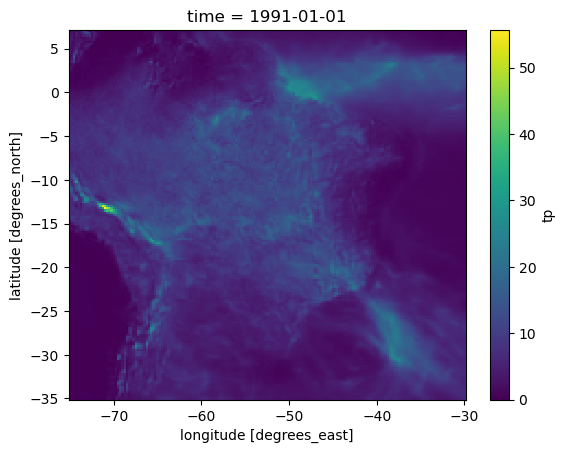

In [12]:
# Plotar o primeiro tempo (mês)
prec_ERA5[0].plot() 

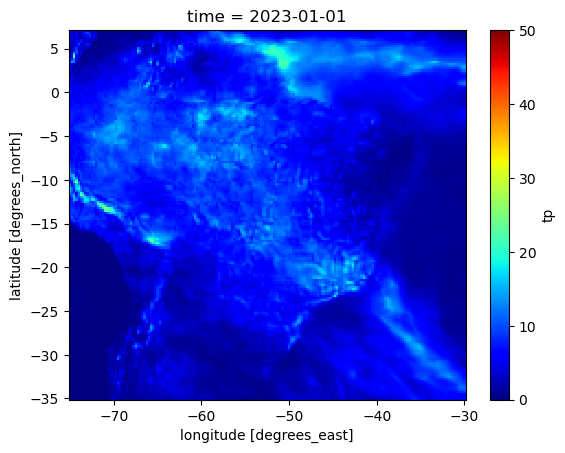

In [13]:
# Plotar para um tempo específico (exemplo Janeiro de 2023), usando a função .sel
prec_jan_2023 = prec_ERA5.sel(time = '2023-01') #seleção de um mês específico
prec_jan_2023.plot(vmin = 0, vmax = 50, cmap = 'jet') #plot com valores mínimo e máximo e escala de cor jet

### Selecionar o período e domínio espacial

In [14]:
# Selecionar para um período de tempo (exemplo entre 1991 a 2023), usando a função .sel e slice
# Utilizando as mesmas funções para o dominio (lat, lon)

df_clim_BR = df.sel(time = slice('1991', '2020')).sel(latitude = slice(6, -36), longitude = slice(-77, -33)) 
# Observação para Latitude e Longitude seguir a ordem apresentadas nos dados

df_clim_BR

<xarray.Dataset>
Dimensions:    (time: 360, longitude: 169, latitude: 165)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
  * longitude  (longitude) float32 -75.0 -74.75 -74.5 ... -33.5 -33.25 -33.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -34.5 -34.75 -35.0
Data variables:
    tp         (time, latitude, longitude) float32 0.006318 0.003268 ... 0.00522
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 08 08:45:59 2024: cdo -v -z zip -sellonlatbox,-75,-...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

### Calcular a climatologia anual para 1991-2020

In [15]:
# Converter a unidade de precipitação para mm/mês (uma vez que o dado é mensal)
# para passar para mm/mês multiplique pela quantidade de dias para cada mês usando a função .time.dt.daysinmonth
df_clim_BR = df_clim_BR * 1000 * df_clim_BR.time.dt.daysinmonth #mm/mês (conversão de unidades)

# Calcular a climatologia anual (mm/ano), multiplica por 12 para passar de mm/mês para mm/ano
df_clim_BR = df_clim_BR.mean(dim = 'time') * 12 

### Selecionar a variável chuva do dataset df_clim_BR e plotar a climatologia

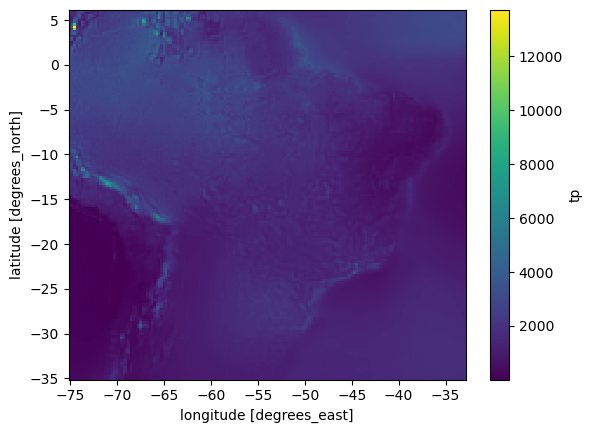

In [16]:
# Selecionar a variável chuva do dataset
prec_clim = df_clim_BR['tp'] 

prec_clim.plot()

### Mascarar a região desejada

In [18]:
# Abrir o shapefile do Brasil
BR_shp = gpd.read_file(path_shape_BR)
BR_shp # print do geodataframe do Brasil

,ScaleRank,LabelRank,FeatureCla,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,TERR_,NAME_SORT,MAP_COLOR,POP_EST,GDP_MD_EST,FIPS_10_,ISO_A2,ISO_A3,ISO_N3,geometry
0,1,2,Adm-0 country,Brazil,BRA,0.0,2.0,Sovereign country,Brazil,BRA,...,None,Brazil,7.0,198739269.0,1993000.0,0.0,BR,BRA,76.0,"MULTIPOLYGON (((-48.54186 -27.81670, -48.55117..."


In [22]:
# Abrir o shapefile das Regiões do Brasil
BR_shp_regs = gpd.read_file(path_shape_BR_regs) 
BR_shp_regs #print do geodataframe das regiões do Brasil

,id,nome,sigla,geometry
0,1,Sul,S,"MULTIPOLYGON (((-52.06416 -22.53384, -52.05556..."
1,2,Sudeste,SE,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804..."
2,3,Norte,N,"MULTIPOLYGON (((-66.61930 -9.89360, -66.62231 ..."
3,4,Nordeste,NE,"MULTIPOLYGON (((-35.15204 -8.91295, -35.15366 ..."
4,5,Centro-Oeste,CO,"MULTIPOLYGON (((-47.30861 -16.03549, -47.31095..."


<GeoAxes: >

C:\Users\igf_i\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


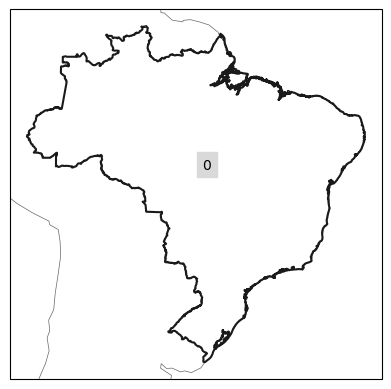

In [19]:
# Abrir o shapefile do Brasil         
mask_BR = rmk.from_geopandas(BR_shp)                     
mask_BR #print da máscara
mask_BR.plot() #plot da máscara

<GeoAxes: >

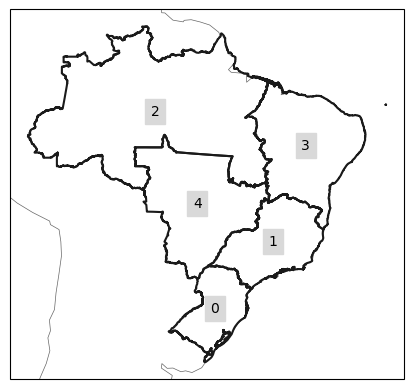

In [23]:
# Abrir o shapefile das Regiões do Brasil
mask_BR_regs = rmk.from_geopandas(BR_shp_regs)                          
mask_BR_regs #print da máscara
mask_BR_regs.plot() #plot da máscara

In [24]:
# Renomear as coordenadas latitude e longitude para lat e lon para poder aplicar a mascara 
prec_clim = prec_clim.rename({'latitude': 'lat', 'longitude': 'lon'}) 

prec_clim

<xarray.DataArray 'tp' (lat: 165, lon: 169)>
array([[2703.12807911, 2121.7908505 , 1353.39650798, ..., 3069.9882581 ,
        3108.4537368 , 3119.05027899],
       [1945.44742146, 1692.67620768, 1444.95828383, ..., 3041.64083073,
        3076.68743708, 3086.92678689],
       [1485.69712011, 1425.65203711, 1576.66318448, ..., 3053.86417789,
        3104.18855043, 3129.41364332],
       ...,
       [ 284.18342171,  281.48509996,  280.23453815, ..., 1718.85336367,
        1721.69483507, 1726.66648225],
       [ 302.53400658,  297.13629634,  303.35416148, ..., 1714.60080006,
        1715.31877398, 1718.98694595],
       [ 315.0821122 ,  318.45404445,  327.18039423, ..., 1711.9866815 ,
        1712.36767044, 1711.09181496]])
Coordinates:
  * lon      (lon) float32 -75.0 -74.75 -74.5 -74.25 ... -33.5 -33.25 -33.0
  * lat      (lat) float32 6.0 5.75 5.5 5.25 5.0 ... -34.25 -34.5 -34.75 -35.0

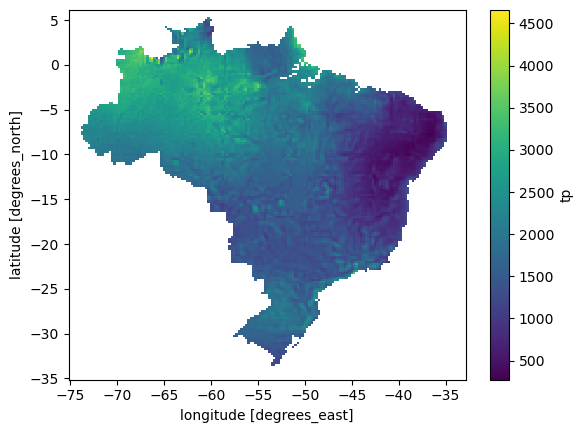

In [25]:
# Criar a variavel prec com a mascara aplicada
prec_clim_mask = mask_BR.mask(prec_clim)  #aplica a máscara na variável de anomalia

# Selecionar qual região mascarar (índice = 0)
prec_clim_mask_BR = prec_clim.where(prec_clim_mask == 0)

# Plotar da prec climatológica com a máscara do Brasil
prec_clim_mask_BR.plot() 


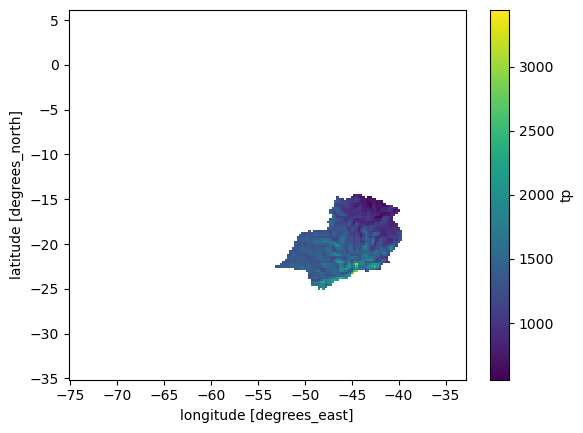

In [26]:
# Aplicar a mascará para as regiões
prec_clim_mask_regs = mask_BR_regs.mask(prec_clim) #aplica a máscara na variável de anomalia

# Selecionando o índice na prec_clim_mask_regs == 1 você seleciona a região epecífica
prec_clim_mask_BR_regs = prec_clim.where(prec_clim_mask_regs == 1) 
prec_clim_mask_BR_regs.plot() #plot da prec climatológica com a máscara da região do Brasil selecionada

### Plotar a climatologia anual em forma de mapa

C:\Users\igf_i\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


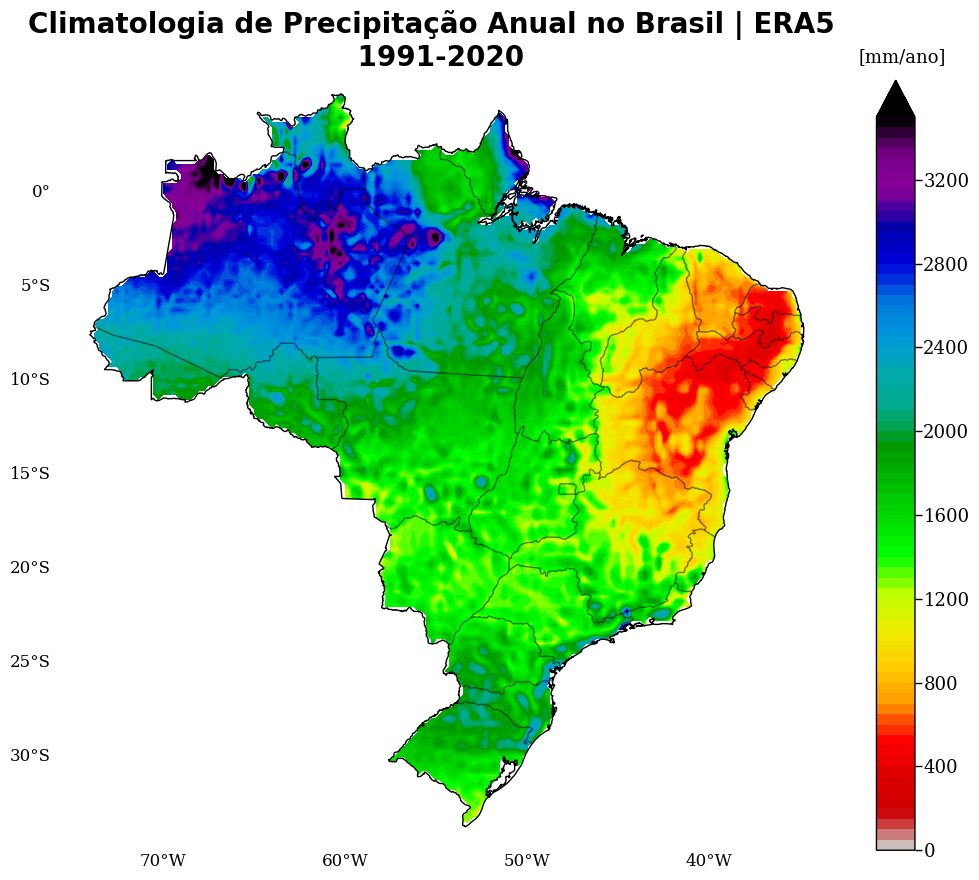

In [27]:
# criar da figura e subplots
fig, ax = plt.subplots(figsize = (15, 10), subplot_kw = dict(projection = ccrs.PlateCarree())) 

# plotar da climatologia
plt.contourf(prec_clim_mask_BR.lon, prec_clim_mask_BR.lat, prec_clim_mask_BR, transform = ccrs.PlateCarree(),
                           cmap = 'nipy_spectral_r', levels = np.arange(0, 3550, 50), extend = 'max') 

# dicionário com tamanho e cor da fonte de texto
font_gl = {'size': 12,'color': 'black'}

#parâmetro do tipo da fonte do texto
plt.rcParams['font.family'] = 'serif'

# plot dos estados
#shape dos estados do Brasil
states = NaturalEarthFeature(category = 'cultural', scale = '50m', facecolor = 'none', name ='admin_1_states_provinces_lines') 
ax.add_feature(states, edgecolor = 'black', linewidth = 1, alpha = 0.5, linestyle = '-') 
    
ax.set_xlim(left = -76, right = -34) #limite da longitude
ax.set_ylim(bottom = -35, top = 6) #limite da latitude

# tudo relacionado ao gl é sobre as linhas de grade da figura
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, alpha = 0) 
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xpadding = 2
gl.ypadding = 2
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-70, -30, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-30, 5, 5))
gl.xlabel_style = font_gl
gl.ylabel_style = font_gl

BR_shp.plot(ax = ax, lw = 1, ec = 'black', fc = 'none') #plot do shape do Brasil

ax.set_title('Climatologia de Precipitação Anual no Brasil | ERA5 \n 1991-2020', 
                fontsize = 20, fontweight = 'bold', pad = 10) #título de cada subplot

plt.setp(ax.spines.values(), linewidth = 0) #altera a espessura da borda da figura

cbar = plt.colorbar() #criação do eixo da escala de cor
cbar.outline.set_linewidth(1) #plot da escalar de cor na vertical
cbar.ax.tick_params(labelsize = 13, width = 1, length = 5, pad = 1) #parâmetros para mudar os ticks da escala
#cbar.set_label('[mm/mês]', fontsize = 13)

ax.text(1.11, 1.03, '[mm/ano]',
          verticalalignment = 'center', horizontalalignment = 'center',
          transform = ax.transAxes,
          color = 'black', fontsize = 13,
          fontweight = 'normal') #plot do texto da unidade próximo à escala de cor

plt.savefig(f'{path_out}Clima_Chuva_Anual_1991-2020_ERA5.jpeg', dpi = 600, bbox_inches = 'tight') #salva a figura
